In [1]:
# Standard library imports
import os

# Third party imports
import matplotlib.pyplot as plt
import numpy as np
import dill

# Local application imports
from smile import helper

# Settings
pickle_dir = 'D:\saved_regressions_large'

In [2]:
def load_from_file(filename):
    with open(filename, 'rb') as f:
        return dill.load(f)

### Regressions (Poster)

In [3]:
regs = load_from_file(pickle_dir+r'\regression_poster_sampled_poplists_0.pik')

In [4]:
slope_options = (1, 2, 3)
from smile.global_params import VMIN

percentage_biases = np.empty(shape=regs.shape, dtype='U64')

for i,j,k in np.ndindex(regs.shape):
    percentage_biases[i,j,k] = str(regs[i,j,k].get_percentage_biases({'Intercept':6, 'visual':(slope_options[i])}))

In [5]:
for i in range(regs.shape[-1]):
    titles = np.empty(regs.shape[:-1], dtype=object)
    titles.flat = [reg.title for reg in regs[:,:,i].flat]
    helper.print_collocated(titles)
    print()
    helper.print_collocated(percentage_biases[:,:,i], hseparatorlen=1)
    print('\n')

poster with 1 and 0.3 filtered 		poster with 1 and 0.5 filtered 
sampled by traditonal          		sampled by traditonal          
regressed with mixed effects   		regressed with mixed effects   

poster with 2 and 0.3 filtered 		poster with 2 and 0.5 filtered 
sampled by traditonal          		sampled by traditonal          
regressed with mixed effects   		regressed with mixed effects   

poster with 3 and 0.3 filtered 		poster with 3 and 0.5 filtered 
sampled by traditonal          		sampled by traditonal          
regressed with mixed effects   		regressed with mixed effects   

Percentage Biases        	Percentage Biases        
Intercept (%)   -2.886200	Intercept (%)   -1.750772
visual (%)       1.5     	visual (%)       0.2     

Percentage Biases        	Percentage Biases        
Intercept (%)   -0.392678	Intercept (%)   -4.508364
visual (%)       0.1     	visual (%)       0.5     

Percentage Biases        	Percentage Biases        
Intercept (%)   -2.228417	Intercept (%)    2.8

### Regressions (realistic)

In [6]:
regs = load_from_file(pickle_dir+r'\regression_worddoc_sampled_poplists_0.pik')

In [7]:
slope_options = (1, 2, 3)

percentage_biases = np.empty(shape=regs.shape, dtype='U64')
stdevs = np.empty(shape=regs.shape, dtype='U64')

for i,j,k in np.ndindex(regs.shape):
    percentage_biases[i,j,k] = str(regs[i,j,k].get_percentage_biases({'Intercept':slope_options[i]*-VMIN, 'visual':slope_options[i]}))
    stdevs[i,j,k] = str(regs[i,j,k].get_stdevs({'Intercept':slope_options[i]*-VMIN, 'visual':slope_options[i]}))

In [8]:
for i in range(regs.shape[-1]):
    titles = np.empty(regs.shape[:-1], dtype=object)
    titles.flat = [reg.title for reg in regs[:,:,i].flat]
    helper.print_collocated(titles)
    print()
    helper.print_collocated(percentage_biases[:,:,i], hseparatorlen=1)
    print('\n')
    helper.print_collocated(stdevs[:,:,i], hseparatorlen=1)
    print('\n')

realistic with 1 and 0.3 filtered 		realistic with 1 and 0.5 filtered 
sampled by traditonal             		sampled by traditonal             
regressed with mixed effects      		regressed with mixed effects      

realistic with 2 and 0.3 filtered 		realistic with 2 and 0.5 filtered 
sampled by traditonal             		sampled by traditonal             
regressed with mixed effects      		regressed with mixed effects      

realistic with 3 and 0.3 filtered 		realistic with 3 and 0.5 filtered 
sampled by traditonal             		sampled by traditonal             
regressed with mixed effects      		regressed with mixed effects      

Percentage Biases        	Percentage Biases        
Intercept (%)    0.089687	Intercept (%)    0.510217
visual (%)       0.0     	visual (%)       0.4     

Percentage Biases        	Percentage Biases        
Intercept (%)   -0.495976	Intercept (%)   -1.084765
visual (%)      -0.3     	visual (%)      -0.9     

Percentage Biases        	Percentage Biases 

In [9]:
def plot_box(self, axeslist, ground_truths=None, direction='row'):
    '''
    Ground truth is either None, or a list of floats (inc. np.Nan for unknown) of same length as number of params
    Direction can be "row" or "col" depending on if the axeslist represents a row or column of a figure
        and determines where the PopulationList title will go
    '''
    #vars
    params_df = self.params_dataframe
    paramnames = params_df.columns
    #check input
    if len(axeslist) != len(paramnames):
        raise ValueError("Not enough axes to plot each parameter.")
    if ground_truths is not None:
        if len(ground_truths) != len(paramnames):
            raise ValueError("Not enough ground truths for each parameter.")
    #plotting
    for i in range(len(paramnames)):
        #Box plot
        boxprops = dict(linewidth=2, color='blue')
        medianprops = dict(linewidth=2, color='blue')
        meanlineprops = dict(linestyle=':', linewidth=2, color='green')
        params_df[paramnames[i]].plot.box(ax=axeslist[i], grid=False, 
                                          boxprops=boxprops, medianprops=medianprops, 
                                          meanprops=meanlineprops, meanline=True, showmeans=True)
        #Ground truth line
        if ground_truths is not None: 
            axeslist[i].axhline(ground_truths[i], xmin=0.0, xmax=1.0, linewidth=1, color='red')
    #RegressionList title
    ax = axeslist[0] #first axis
    if direction=='col':
        pad=30
        color='blue'
        ax.annotate(self.title, xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', 
                        textcoords='offset points', size='large', ha='center', va='baseline', color=color)
    elif direction=='row':
        pad=15
        ax.annotate(self.title, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad-pad, 0), xycoords=ax.yaxis.label, 
                        textcoords='offset points', size='large', ha='right', va='center', color='blue')
    else: 
        raise ValueError("Unknown direction {}".format(direction))


C:\ProgramData\Anaconda3\envs\smile\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\ProgramData\Anaconda3\envs\smile\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\ProgramData\Anaconda3\envs\smile\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


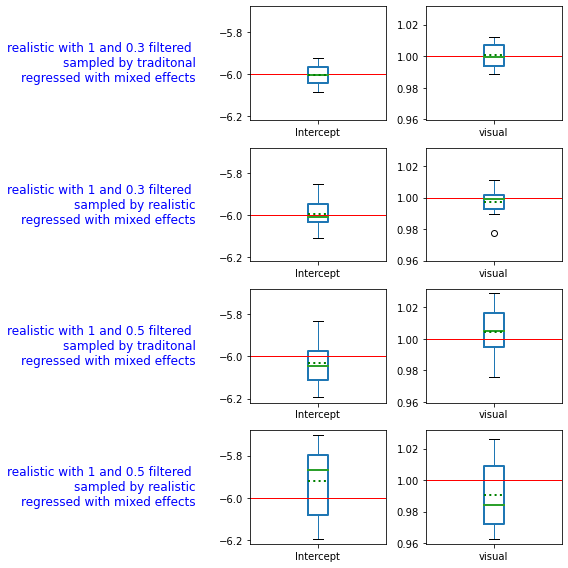

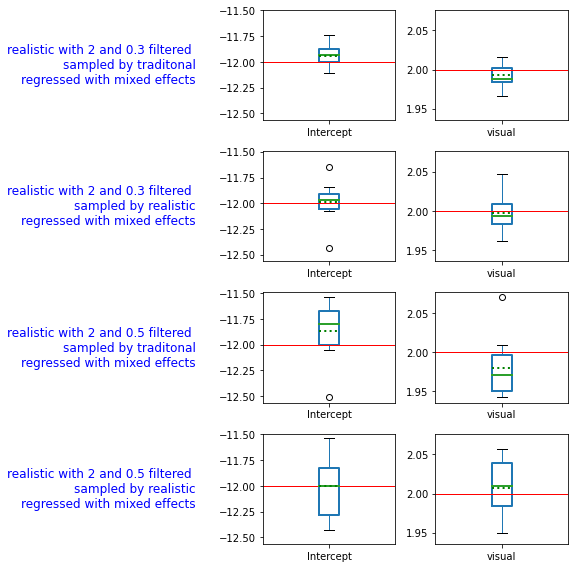

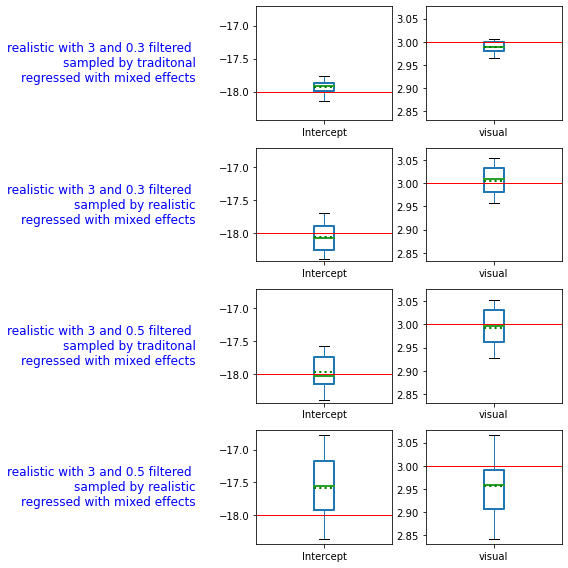

In [10]:
slope_options = (1, 2, 3)

for i in range(regs.shape[0]):
    ncols = 2 #number of parameters, TODO
    nrows = regs[0].size

    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, 
                             figsize=plt.figaspect(0.5*nrows/ncols)*2, 
                             sharey='none', squeeze=False)

    ylims = np.empty(shape=(nrows, ncols, 2), dtype=float)
    
    row = 0
    for j,k in np.ndindex(regs.shape[1:]):
        intercept = slope_options[i]*-VMIN
        visual_slope = slope_options[i]
        regs[i,j,k].plot_box(axes[row], [intercept, visual_slope], direction='row')
        for col in range(ncols):
            ylims[row,col] = axes[row,col].get_ylim()
        row += 1
        
    ylims = np.vstack([ylims[:,:,0].min(axis=0), ylims[:,:,1].max(axis=0)]).T #each entry are the ylims for a column
    for row in range(nrows):
        for col in range(ncols):
            axes[row, col].set_ylim(ylims[col])

    fig.tight_layout()
    fig.show()
#dotted green line is the mean, solid green line is the median

In [11]:
poplists = load_from_file(r'D:\saved_populations\poster_sampled_poplists_0.pik')

In [13]:
poplists[0,0,0][0].data_shape

(629, 3)